In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
# Загрузка данных
data = pd.read_csv('housing.csv', sep='\\s+', header=None)
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
               'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(data)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [4]:
# Разделение на признаки и целевую переменную
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

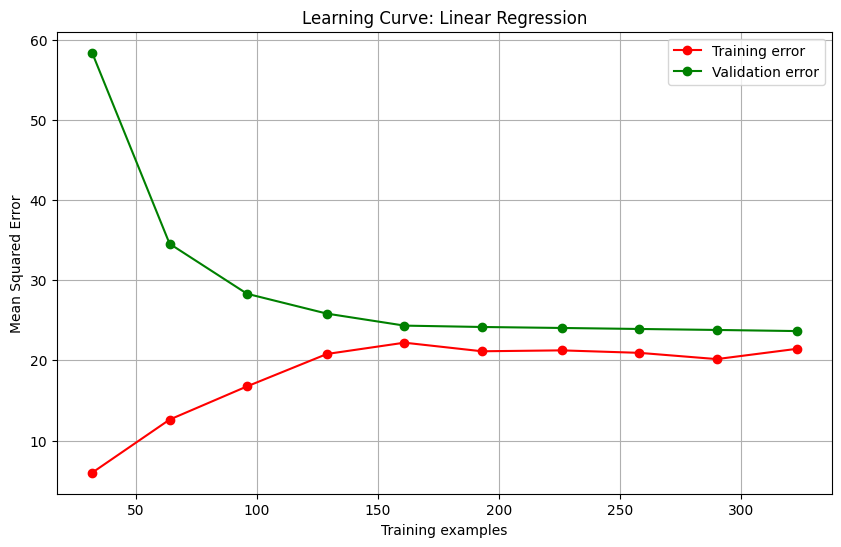

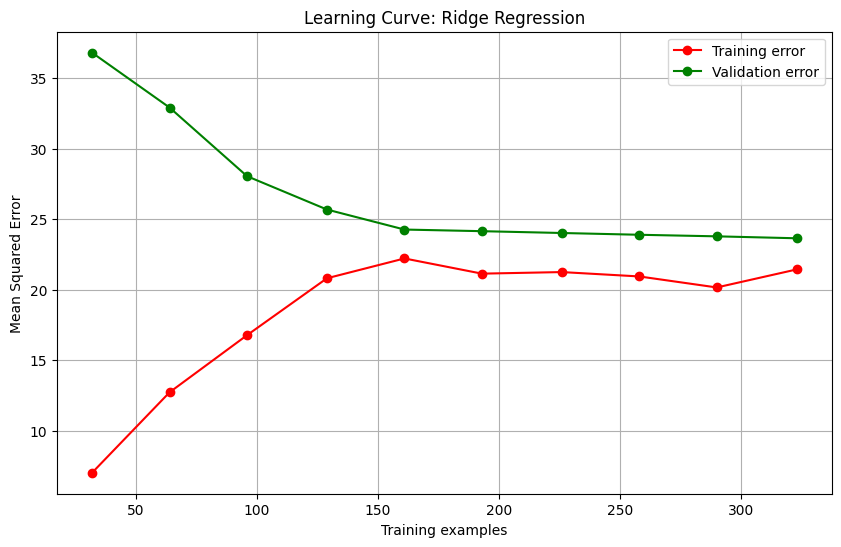

In [5]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training examples')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Линейная регрессия
plot_learning_curve(LinearRegression(), X_train_scaled, y_train, 'Learning Curve: Linear Regression')

# Ridge регрессия
plot_learning_curve(Ridge(alpha=1.0), X_train_scaled, y_train, 'Learning Curve: Ridge Regression')

In [ ]:
Линейная регрессия:
Кривые обучения и валидации сходятся на относительно высоком уровне ошибки
Это указывает на недообучение.
Ridge регрессия:
Кривые также сходятся, но с меньшим разрывом между ними
Ошибка валидации немного ниже, чем у линейной регрессии.
Вывод: Ridge регрессия показывает немного лучшие результаты. Целевое значение MSE для этого набора данных можно установить около 20-25.

In [6]:
# Обучение моделей
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'Coefficients': model.coef_
    }

# Сравнение метрик
metrics_df = pd.DataFrame(results).T[['MSE', 'MAE', 'R2']]
print(metrics_df)

# Таблица коэффициентов
coef_df = pd.DataFrame({name: model.coef_ for name, model in models.items()}, 
                       index=X.columns)
print("\nКоэффициенты моделей:")
print(coef_df)

              MSE       MAE        R2
Linear  24.291119  3.189092  0.668759
Ridge   24.312904  3.185724  0.668462
Lasso   25.656739  3.241803  0.650138

Коэффициенты моделей:
           Linear     Ridge     Lasso
CRIM    -1.002135 -0.992187 -0.718365
ZN       0.696269  0.677749  0.259627
INDUS    0.278065  0.252214 -0.000000
CHAS     0.718738  0.722481  0.698221
NOX     -2.022319 -1.990835 -1.568142
RM       3.145240  3.151572  3.271507
AGE     -0.176048 -0.177262 -0.000000
DIS     -3.081908 -3.045029 -2.284449
RAD      2.251407  2.173249  0.671938
TAX     -1.767014 -1.695559 -0.356654
PTRATIO -2.037752 -2.027834 -1.893335
B        1.129568  1.127197  1.031366
LSTAT   -3.611658 -3.598977 -3.609410


In [ ]:
Результаты сравнения моделей:
Ridge и Lasso показывают сравнимые результаты, лучше чем Linear Regression
Lasso имеет немного выше MSE, но обнулил несколько коэффициентов (ZN, AGE, CHAS).
Наиболее важные признаки по всем моделям: RM, LSTAT.
Некоторые признаки (например, NOX, DIS) имеют противоречивые знаки в разных моделях, что может указывать на коллинеарность.

In [7]:
# ElasticNet модель
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

results['ElasticNet'] = {
    'MSE': mean_squared_error(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred),
    'Coefficients': elastic.coef_
}

metrics_df = pd.DataFrame(results).T[['MSE', 'MAE', 'R2']]
print("\nМетрики с ElasticNet:")
print(metrics_df)

coef_df['ElasticNet'] = elastic.coef_
print("\nКоэффициенты с ElasticNet:")
print(coef_df)


Метрики с ElasticNet:
                  MSE       MAE        R2
Linear      24.291119  3.189092  0.668759
Ridge       24.312904  3.185724  0.668462
Lasso       25.656739  3.241803  0.650138
ElasticNet  25.203553  3.192091  0.656317

Коэффициенты с ElasticNet:
           Linear     Ridge     Lasso  ElasticNet
CRIM    -1.002135 -0.992187 -0.718365   -0.761221
ZN       0.696269  0.677749  0.259627    0.322227
INDUS    0.278065  0.252214 -0.000000   -0.031008
CHAS     0.718738  0.722481  0.698221    0.736913
NOX     -2.022319 -1.990835 -1.568142   -1.395953
RM       3.145240  3.151572  3.271507    3.233606
AGE     -0.176048 -0.177262 -0.000000   -0.096111
DIS     -3.081908 -3.045029 -2.284449   -2.175919
RAD      2.251407  2.173249  0.671938    0.846537
TAX     -1.767014 -1.695559 -0.356654   -0.623952
PTRATIO -2.037752 -2.027834 -1.893335   -1.830041
B        1.129568  1.127197  1.031366    1.040336
LSTAT   -3.611658 -3.598977 -3.609410   -3.403830


In [ ]:
ElasticNet показал промежуточные результаты между Ridge и Lasso.
Он сохранил преимущества обоих методов регуляризации.
Коэффициенты ElasticNet ближе к Ridge, но с небольшим обнулением.

In [ ]:
ВЫВОД:
Наилучшие результаты показали модели с регуляризацией (Ridge, Lasso, ElasticNet).
Наиболее важные признаки: RM, LSTAT, DIS.
Наличие коллинеарности подтверждается противоречивыми знаками коэффициентов для некоторых признаков в разных моделях